In [1]:
import os
os.chdir("../../../")
os.getcwd()

'/Users/sbokupripeku/git/work/examples/costly_nonstationary_bandits'

In [2]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

import algorithms

In [3]:
with open('experiments/nursery/results/policy_objects.pickle', 'rb') as f:
    policies = pickle.load(f)

In [4]:
policies

({'Random': <algorithms.random_policy.RandomPolicy at 0x105d7f460>,
  '$\\epsilon$-greedy': <algorithms.egreedy.EpsilonGreedy at 0x105d7f520>,
  'UCB1': <algorithms.ucb.UCB1 at 0x105d7f370>,
  'LinUCB': <algorithms.linucb.LinUCB at 0x105d7eaa0>,
  'PS-LinUCB': <algorithms.ps_linucb.PSLinUCB at 0x105d7eb00>,
  'SimOOS': <algorithms.sim_oos.SimOOSAlgorithm at 0x11f160b80>,
  'Algorithm1': <algorithms.alg1.Algorithm1 at 0x11f1631f0>,
  'Oracle': <algorithms.oracle_alg1.Algorithm1_Oracle at 0x11f1f0dc0>},)

In [5]:
alg1 = policies[0]['Algorithm1']
oracle = policies[0]['Oracle']
simoos = policies[0]['SimOOS']

In [6]:
def get_accuracy_new(alg1_object):
    N_FEATURES = alg1_object.max_no_red_context
    counts = np.zeros(N_FEATURES+1, dtype=int)
    rewards = np.zeros(N_FEATURES+1, dtype=int)
    accuracies = np.zeros(N_FEATURES+1)
    
    T = len(alg1_object.selected_context_SimOOS)
    
    # for each l what happens when we observe up to l features
    for l in range(len(counts)):
        for j in range(l+1):
            for t in range(T):
                observation = alg1_object.selected_context_SimOOS[t, :]
                reward = alg1_object.collected_rewards_SimOOS[t]
                num_observed = np.count_nonzero(observation)
                
                indicator = 1 if (num_observed == j) else 0
                counts[l] += indicator
                rewards[l] += reward * indicator
                
    print(rewards)
    print(counts)
    for l in range(len(accuracies)):
        accuracies[l] = rewards[l] / counts[l] if counts[l] != 0 else 0
    return accuracies

In [7]:
list(range(0))

[]

In [8]:
get_accuracy_new(alg1)

[   0    1    8 7530 7532 7532]
[    1     6    20  9992  9999 10000]


array([0.        , 0.16666667, 0.4       , 0.75360288, 0.75327533,
       0.7532    ])

In [9]:
alg1.selected_context_SimOOS[0]

array([0., 0., 0., 0., 0.])

In [10]:
alg1.collected_rewards_SimOOS[0]

0.0

In [35]:
accuracies = {
#     'Oracle': get_accuracy_new(oracle),
    'Algorithm1': get_accuracy_new(alg1),
    
#     'Sim-OOS': get_accuracy_new(simoos),
}

[   0    1    8 7530 7532 7532]
[    1     6    20  9992  9999 10000]


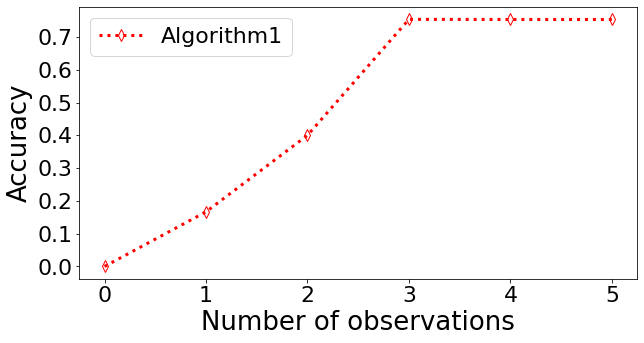

In [37]:


fig, ax = plt.subplots(1, figsize=(10, 5))
ind_to_params = {
        # ind: (mark, color)
        0: ('d','red'), 1: ('o','deepskyblue'), 2:('s', 'darkblue') , 3: ('>','orange'),
        4: ('^', 'm'), 5: ('<', 'k'), 6: ('x','green'),
    }

for ind, (algorithm_name, accuracy_for_cost) in enumerate(accuracies.items()):
    mark, color = ind_to_params[ind]
    ax.plot(
        range(len(accuracy_for_cost)),
        accuracy_for_cost,
        label=algorithm_name,
        marker=mark, markersize=8, fillstyle='none',
        c=color, linestyle=':', linewidth=3,
    )
    
ax.set_xlabel('Number of observations', fontsize=26)
ax.set_ylabel('Accuracy', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # Only integer labels

plt.legend(prop={'size': 22});

plt.savefig('experiments/nursery/making_figures/nursery_accuracy.pdf', bbox_inches='tight')
plt.show()